In [ ]:
#Practical 1
#depth first search

In [ ]:
graph1 = {"A": ["B", "C"],
          "B": ["C"],
          "C": ["D"]}
graph2 = {"A": ["D", "C", "B"],
          "B": ["E"],
          "C": ["G", "F"],
          "D": ["H"],
          "E": ["I"],
          "F": ["J"]}
graph3 = {"1": ["7", "5"],
          "7": ["2", "6"],
          "5": ["9"],
          "6": ["3", "11"],
          "9": ["4"]}
graph4 = {"10": ["14", "19"],
          "14": ["26", "31"],
          "19": ["42", "27"],
          "26": ["44", "35"],
          "31": ["33"]}
graph5 = {"100": ["19", "36"],
          "19": ["17", "3"],
          "36": ["25", "1"],
          "17": ["2", "7"] }


def dfs_non_recursive(graph1, source):
    if source is None or source not in graph1:
        return "Invalid input"
    path = []
    stack = [source]
    while (len(stack) != 0):
        s = stack.pop()
        if s not in path:
            path.append(s)
        if s not in graph1:
            #leaf node
            continue
        for neighbor in graph1[s]:
            stack.append(neighbor)
            return " ".join(path)

DFS_path1 = dfs_non_recursive(graph1, "A")
print(DFS_path1)
DFS_path2 = dfs_non_recursive(graph2, "A")
print(DFS_path2)
DFS_path3 = dfs_non_recursive(graph3, "1")
print(DFS_path3)
DFS_path4 = dfs_non_recursive(graph4, "10")
print(DFS_path4)
DFS_path5 = dfs_non_recursive(graph5, "100")
print(DFS_path5)

A
A
1
10
100


In [ ]:
#Practical 2
#breadth fs

In [ ]:
graph = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}

visited=[]
queue=[]

def bfs(visited, graph, node):
  visited.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0)
    print (s, end = " ")

    for neighbour in graph[s]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

bfs(visited, graph, 'A')

In [ ]:
#Practical 3 N queen

class Solution(object):
    def solveNQueens(self, n):
        left,upleft,lowleft=[0]*n,[0]*(2*n-1),[0]*(2*n-1)
        ans=[]
        def solve(col,board):
            if col==n:
                ans.append(["".join(i) for i in board])
                return
            for row in range(n):
                if not left[row] and not upleft[n-1+row-col] and not lowleft[row+col]:
                    board[row][col]="Q"
                    left[row]=1
                    upleft[n-1+row-col]=1
                    lowleft[row+col]=1
                    solve(col+1,board)
                    board[row][col]="."
                    left[row]=0
                    upleft[n-1+row-col]=0
                    lowleft[row+col]=0
        board=[["." for i in range(n)] for _ in range(n)]
        solve(0,board)
        return ans

print(Solution())

In [ ]:
#Practical 4 Tic Tac Toe
def draw_board(board):
    print("-------------")
    for i in range(3):
        print("|", board[i][0], "|", board[i][1], "|", board[i][2], "|")
        print("-------------")

def check_winner(board, player):
    for i in range(3):
        if board[i][0] == player and board[i][1] == player and board[i][2] == player:
            return True
        if board[0][i] == player and board[1][i] == player and board[2][i] == player:
            return True
    if board[0][0] == player and board[1][1] == player and board[2][2] == player:
        return True
    if board[0][2] == player and board[1][1] == player and board[2][0] == player:
        return True
    return False

def tic_tac_toe():
    # Initialize the board
    board = [[' ', ' ', ' '], [' ', ' ', ' '], [' ', ' ', ' ']]

    # Initialize players
    players = ['X', 'O']
    current_player = players[0]

    # Main game loop
    while True:
        # Draw the board
        draw_board(board)

        # Get the current player's move
        while True:
            row = int(input(f"Player {current_player}, enter row number (1-3): "))
            col = int(input(f"Player {current_player}, enter column number (1-3): "))
            if board[row-1][col-1] == ' ':
                break
            print("That spot is already taken. Try again.")

        # Make the move
        board[row-1][col-1] = current_player

        # Check if the game is over
        if check_winner(board, current_player):
            print(f"Player {current_player} wins!")
            draw_board(board)
            break
        elif all([board[i][j] != ' ' for i in range(3) for j in range(3)]):
            print("It's a tie!")
            draw_board(board)
            break

        # Switch to the other player
        current_player = players[(players.index(current_player) + 1) % 2]

# Start the game
tic_tac_toe()

In [ ]:
#Practical 5 Water jug
from collections import defaultdict

jug1, jug2, aim = 4, 3, 2

visited = defaultdict(lambda: False)

def waterJugSolver(amt1, amt2):

	if (amt1 == aim and amt2 == 0) or (amt2 == aim and amt1 == 0):
		print(amt1, amt2)
		return True

	if visited[(amt1, amt2)] == False:
		print(amt1, amt2)

		visited[(amt1, amt2)] = True

		return (waterJugSolver(0, amt2) or
				waterJugSolver(amt1, 0) or
				waterJugSolver(jug1, amt2) or
				waterJugSolver(amt1, jug2) or
				waterJugSolver(amt1 + min(amt2, (jug1-amt1)),
				amt2 - min(amt2, (jug1-amt1))) or
				waterJugSolver(amt1 - min(amt1, (jug2-amt2)),
				amt2 + min(amt1, (jug2-amt2))))

	else:
		return False

print("Steps: ")

waterJugSolver(0, 0)


In [ ]:
#Practical 6 A*
def aStarAlgo(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set()
    g = {}
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node
    while len(open_set) > 0:
        n = None
        for v in open_set:
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v
        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)
        if n == None:
            print('Path does not exist!')
            return None
        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()
            print('Path found: {}'.format(path))
            return path
        open_set.remove(n)
        closed_set.add(n)
    print('Path does not exist!')
    return None

def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

def heuristic(n):
    H_dist = {
        'A': 11,
        'B': 6,
        'C': 99,
        'D': 1,
        'E': 7,
        'G': 0,
    }
    return H_dist[n]

#Describe your graph here
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('A', 2), ('C', 1), ('G', 9)],
    'C': [('B', 1)],
    'D': [('E', 6), ('G', 1)],
    'E': [('A', 3), ('D', 6)],
    'G': [('B', 9), ('D', 1)]
}
aStarAlgo('A','G')

In [ ]:
#Practical 7 8 puzzle problem
import copy
from heapq import heappush, heappop
n = 3
row = [ 1, 0, -1, 0 ]
col = [ 0, -1, 0, 1 ]
class priorityQueue:
	def __init__(self):
		self.heap = []
	def push(self, k):
		heappush(self.heap, k)
	def pop(self):
		return heappop(self.heap)
	def empty(self):
		if not self.heap:
			return True
		else:
			return False
class node:

	def __init__(self, parent, mat, empty_tile_pos,
				cost, level):
		self.parent = parent
		self.mat = mat
		self.empty_tile_pos = empty_tile_pos
		self.cost = cost
		self.level = level
	def __lt__(self, nxt):
		return self.cost < nxt.cost
def calculateCost(mat, final) -> int:

	count = 0
	for i in range(n):
		for j in range(n):
			if ((mat[i][j]) and
				(mat[i][j] != final[i][j])):
				count += 1

	return count

def newNode(mat, empty_tile_pos, new_empty_tile_pos,
			level, parent, final) -> node:
	new_mat = copy.deepcopy(mat)
	x1 = empty_tile_pos[0]
	y1 = empty_tile_pos[1]
	x2 = new_empty_tile_pos[0]
	y2 = new_empty_tile_pos[1]
	new_mat[x1][y1], new_mat[x2][y2] = new_mat[x2][y2], new_mat[x1][y1]
	cost = calculateCost(new_mat, final)
	new_node = node(parent, new_mat, new_empty_tile_pos,
					cost, level)
	return new_node
def printMatrix(mat):
	for i in range(n):
		for j in range(n):
			print("%d " % (mat[i][j]), end = " ")
		print()
def isSafe(x, y):
	return x >= 0 and x < n and y >= 0 and y < n
def printPath(root):
	if root == None:
		return
	printPath(root.parent)
	printMatrix(root.mat)
	print()
def solve(initial, empty_tile_pos, final):
	pq = priorityQueue()
	cost = calculateCost(initial, final)
	root = node(None, initial,
				empty_tile_pos, cost, 0)
	pq.push(root)
	while not pq.empty():
		minimum = pq.pop()
		if minimum.cost == 0:
			printPath(minimum)
			return
		for i in range(4):
			new_tile_pos = [
				minimum.empty_tile_pos[0] + row[i],
				minimum.empty_tile_pos[1] + col[i], ]

			if isSafe(new_tile_pos[0], new_tile_pos[1]):
				child = newNode(minimum.mat,
								minimum.empty_tile_pos,
								new_tile_pos,
								minimum.level + 1,
								minimum, final,)

				pq.push(child)

initial = [ [ 1, 2, 3 ],
			[ 5, 6, 0 ],
			[ 7, 8, 4 ] ]

final = [ [ 1, 2, 3 ],
		[ 5, 8, 6 ],
		[ 0, 7, 4 ] ]

empty_tile_pos = [ 1, 2 ]

solve(initial, empty_tile_pos, final)



In [ ]:
#Practical 8 travelling salesman
from sys import maxsize
from itertools import permutations
V = 4

def tsp(graph, s):
	vertex = []
	for i in range(V):
		if i != s:
			vertex.append(i)
	min_path = maxsize
	next_permutation=permutations(vertex)
	for i in next_permutation:
		current_pathweight = 0
		k = s
		for j in i:
			current_pathweight += graph[k][j]
			k = j
		current_pathweight += graph[k][s]
		min_path = min(min_path, current_pathweight)

	return min_path


if __name__ == "__main__":
	graph = [[0, 10, 15, 20], [10, 0, 35, 25],
			[15, 35, 0, 30], [20, 25, 30, 0]]
	s = 0
	print(tsp(graph, s))


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

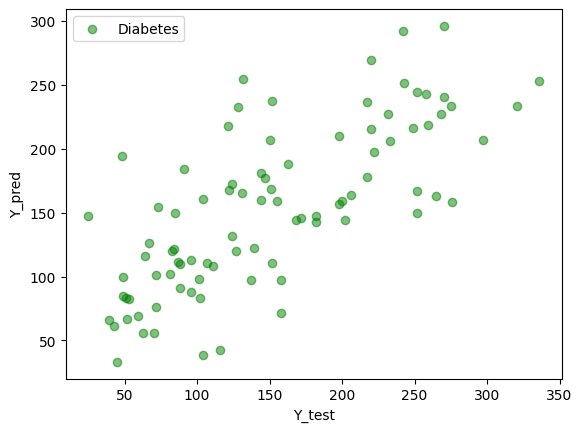

In [1]:
#Practical 10 linear regression

# %%
from sklearn import datasets
diabetes = datasets.load_diabetes()

# %%
diabetes

# %%
#Description of the Diabetes dataset
print(diabetes.DESCR)

# %%
#Feature names
print(diabetes.feature_names)

# %%
#Create X and Y data matrices
X = diabetes.data
Y = diabetes.target

# %%
X.shape, Y.shape

# %%
#Data split
#Import library
from sklearn.model_selection import train_test_split

# %%
#Perform 80/20 Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# %%
#Data dimension
X_train.shape, Y_train.shape

# %%
#Import library
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# %%
#Build linear regression
#Defines the regression model
model = linear_model.LinearRegression()

# %%
#Build training model
model.fit(X_train, Y_train)

# %%
#Apply trained model to make prediction (on test set)
Y_pred = model.predict(X_test)

# %%
#Prediction results
#Print model performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
% mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
% r2_score(Y_test, Y_pred))

# %%
import matplotlib.pyplot as plt
import numpy as np

# %%
plt.scatter(Y_test,Y_pred, c="g", alpha=0.5, marker=r'o',
label="Diabetes")
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.legend(loc='upper left')
plt.show()


